### Problem Statement

In [1]:
import tests.custom_tests as tests

N, values, weights, W_capacity = tests.medium_test()

print(N)
print(weights)
print(W_capacity)
print(values)

4
[29, 78, 36, 52]
114
[[58], [62, 44], [11, 11, 42], [88, 49, 29, 61]]


### Exact solution

[Qibo 0.2.7|INFO|2024-05-22 15:25:10]: Using numpy backend on /CPU:0
[Qibo 0.2.7|WARNING|2024-05-22 15:25:10]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-05-22 15:25:10]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Best feasible profit: 207
Minimum energy: -272.926
Minimum energy without offset: -585.8504999999996
s = 0 : [(-4.000000000000003+0j), (-2.0000000000000004+0j)]
s = 1 : [(-58.742569651029655+0j), (-50.24214995203636+0j)]
s = 2 : [(-117.23270028547336+0j), (-100.32742269116297+0j)]
s = 3 : [(-175.78713351321028+0j), (-150.4531904821593+0j)]
s = 4 : [(-234.35782880369263+0j), (-200.58896384217317+0j)]
s = 5 : [(-292.93504491921+0j), (-250.7287291801507+0j)]
s = 6 : [(-351.515524227112+0j), (-300.8704887224091+0j)]
s = 7 : [(-410.0978688849492+0j), (-351.01338738041756+0j)]
s = 8 : [(-468.68137957742294+0j), (-401.1569978630569+0j)]
s = 9 : [(-527.2656676848885+0j), (-451.30108285780335+0j)]
s = 10 : [(-585.8505+0j), (-501.4455000000002+0j)]


c:\Users\mique\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\mique\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


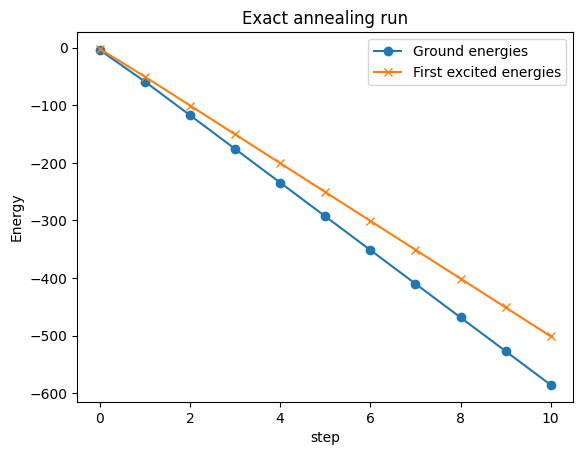

estimated minimum gap:  (2.000000000000002+0j)


In [2]:
from exact_solver import Exact_solver

exact_solver = Exact_solver(W_capacity, weights, values)

best_feasible_profit, minimum_energy = exact_solver.run()

print(f'Best feasible profit: {best_feasible_profit}')
print(f'Minimum energy: {minimum_energy}')
print(f'Minimum energy without offset: {minimum_energy - exact_solver.offset}')


exact_solver.annealing_run(10)

### Qibo simulated annealing

[Qibo 0.2.7|WARNING|2024-05-22 15:25:10]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.7|WARNING|2024-05-22 15:25:10]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Exact solution has items:  [0, 2, 3]
fins aqui
Target energy -585.8505
+ offset (312.9244999999996) = -272.9260000000004
final annealing energy:  -376.03081687270685
-------- Solution has items:  [0, 2, 3] --------
 - Evaluating candidate  [0, 2, 3]
Profit: 289
Weight: 117 (does NOT satisfy constraint W=114)
Energy: -272.926
-------------------------------------------------


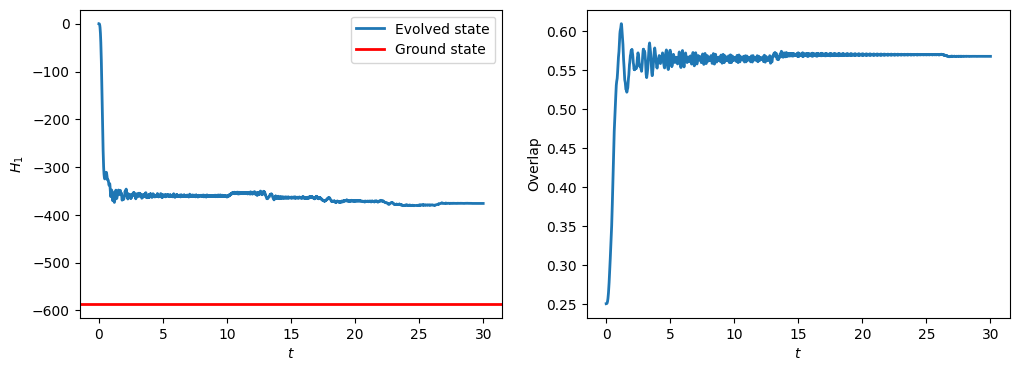

In [3]:
from qibo_solver import Qibo_annealing_solver

Qibo_solver = Qibo_annealing_solver(W_capacity, weights, values)
Qibo_solver.exact_solution()
h1 = Qibo_solver.get_ham()
print('fins aqui')

T = 30 # Total time of the adiabatic evolution.
Qibo_solver.run(T)
Qibo_solver.show_solution()

### DMRG

[[117.867   0.   ]
 [  0.    117.867]]
[[94.081  0.   ]
 [ 0.    94.081]]


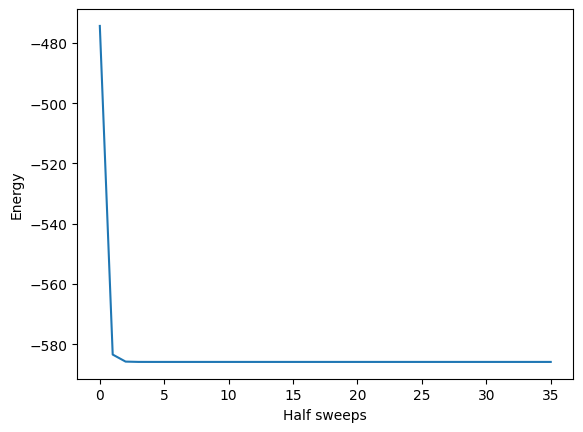

Solution energy = -585.8504999999999 + 312.9244999999996 (offset) = -272.9260000000003
-------- Solution has items:  [0, 2, 3] --------
 - Evaluating candidate  [0, 2, 3]
Profit: 289
Weight: 117 (does NOT satisfy constraint W=114)
Energy: -272.926
-------------------------------------------------


In [4]:
from dmrg_solver import DMRG_solver

chi = 32
qkp_DMRG = DMRG_solver(W_capacity, weights, values, chi)

s = 1 # time of annealing we want to simulate
qkp_DMRG.build_MPO_time_s(s)

numsweeps = 6 # number of DMRG sweeps
qkp_DMRG.run(numsweeps)

qkp_DMRG.show_solution()


 ---- s= 0  ----
[[0. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 0.]]
Solution energy = -3.999999999999999 + 312.9244999999996 (offset) = 308.9244999999996
DMRG energy:  -3.999999999999999
Real gap:  [-4.0, -2.000000000000003]
 ---- s= 1  ----
[[11.7867  0.    ]
 [ 0.     11.7867]]
[[9.4081 0.    ]
 [0.     9.4081]]
Solution energy = -58.742569651029676 + 312.9244999999996 (offset) = 254.18193034896996
DMRG energy:  -58.742569651029676
Real gap:  [-58.74256965102963, -50.24214995203623]
 ---- s= 2  ----
[[23.5734  0.    ]
 [ 0.     23.5734]]
[[18.8162  0.    ]
 [ 0.     18.8162]]
Solution energy = -117.23270028547354 + 312.9244999999996 (offset) = 195.6917997145261
DMRG energy:  -117.23270028547354
Real gap:  [-117.23270028547346, -100.32742269116288]
 ---- s= 3  ----
[[35.3601  0.    ]
 [ 0.     35.3601]]
[[28.2243  0.    ]
 [ 0.     28.2243]]
Solution energy = -175.78713351321025 + 312.9244999999996 (offset) = 137.13736648678938
DMRG energy:  -175.78713351321025
Real gap:  [-175.78713351320994, -15

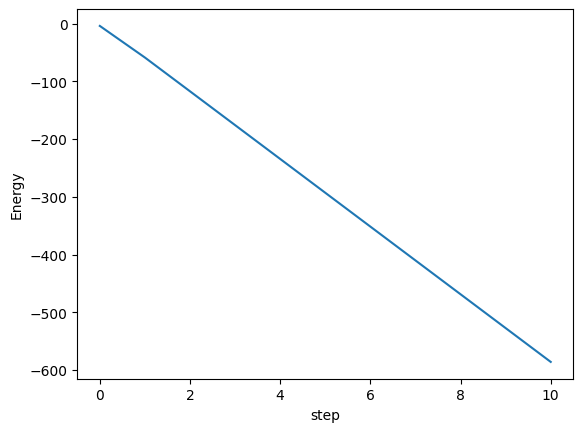

In [5]:
qkp_DMRG.annealing_run()